# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [106]:
# 동일 경로에 "train.csv"가 있다면:
# 데이터 불러오기

titanic_df = pd.read_csv("./titanic_train.csv")

## 1. 분석의 목적과 변수 확인

* 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [5]:
# 상위 5개 데이터 확인하기

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [7]:
## 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe()  # 수치형 데이터에 대한 요약만을 제공 (int, float 등)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
'''
Correlation is NOT Causation

상관성 : A up, B up, ...
상관성이 높게 나온다하더라도 인과성이 성립하는 것은 아니다.

인과성 : A -> B (원인과 결과)
인과성을 증명하는 것은 어려운 일
'''
# 상관계수 확인

titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [16]:
## 결측치 확인

titanic_df.isnull().sum() 
# Age, Cabin, Embarked에서 결측치 발견

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

In [20]:
## 생존자, 사망자 명수는?

titanic_df['Survived'].sum()  # 342 : 생존자의 수 (1 + 0 + 1 + ...)

342

In [21]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

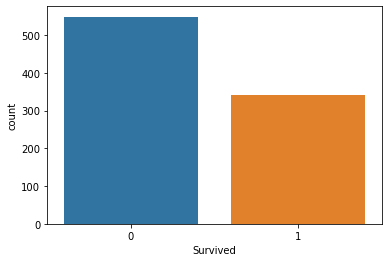

In [23]:
# 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### II. Pclass

In [31]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass','Survived']].groupby(by='Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [29]:
# 생존자 인원?

titanic_df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [32]:
# 생존자 비율

titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


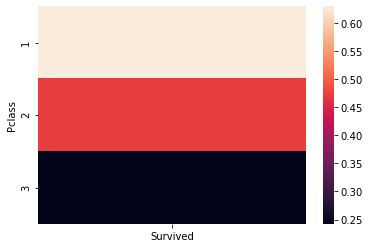

In [33]:
# 히트맨 활용

sns.heatmap(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.show()

### III. Sex

In [34]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [57]:
titanic_df.groupby(['Survived', 'Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [56]:
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

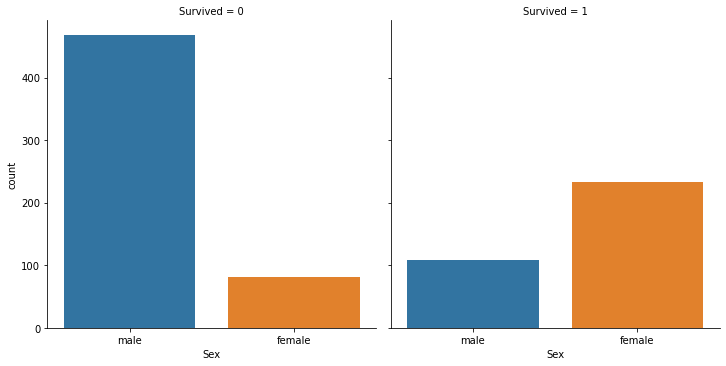

In [41]:
# sns.catplot
# col - 케이스 분류

sns.catplot(x='Sex', col='Survived' ,kind='count' ,data=titanic_df)

### IV. Age

**Remind : 결측치 존재**

In [44]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [48]:
titanic_df[titanic_df['Survived'] == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

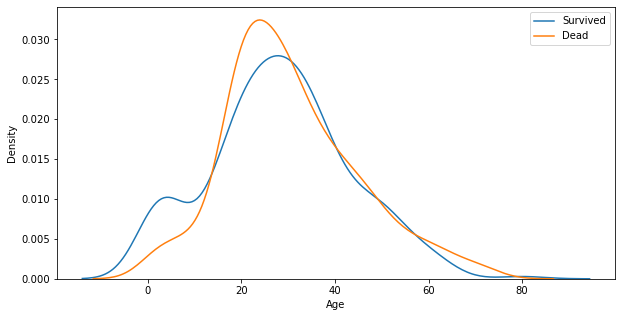

In [50]:
# 커널 밀도 그림
# Survived 1, 0과 Ae의 경향성

# figure -> axis -> plot
# 도면 -> x, y축 틀 -> 그리기

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived', 'Dead'])

plt.show()

## Appendix I. Sex + Pclass vs Survived

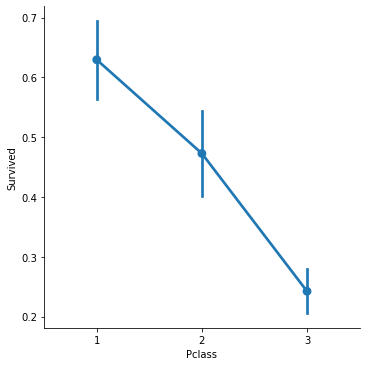

In [52]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)
plt.show()

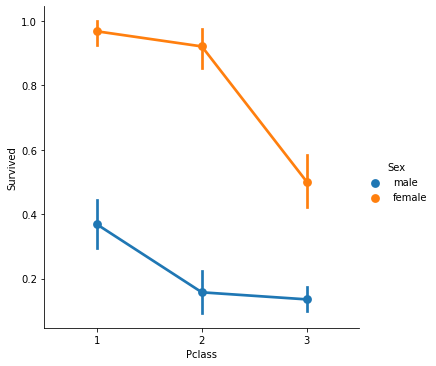

In [58]:
# hue : 새로운 범주로 그래프를 나눌 수 있는 파라미터

# 57번의 표를 그래프로 그린것
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

### Appendix II. Age + Pclass

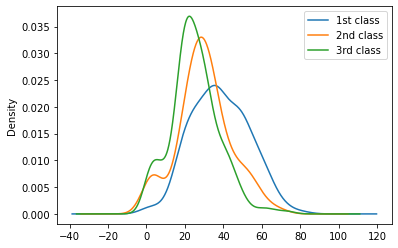

In [59]:
## Age graph wirh Pclass

titanic_df['Age'][titanic_df['Pclass'] == 1].plot(kind='kde')
titanic_df['Age'][titanic_df['Pclass'] == 2].plot(kind='kde')
titanic_df['Age'][titanic_df['Pclass'] == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

**무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다.**
1. 데이터를 뽑아봅시다.
    * 각 데이터는 어떤 자료형을 가지고 있나요?
    * 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
    * 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터의 대한 가설을 세워봅시다.
    * 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    * 가설은 명확할 수록 좋습니다. ex) Titanic Data에서 Survived 여부와 성별에는 상관관계가 있다.
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    * 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.
    * `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    * `.merge()`를 통해서 두 개 이상의 DataFrame을 합치면 어떨까요?
    * 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?



### sibip + survived

- 가족이 있다면 생존력이 더 좋아지지않을까??

In [68]:
titanic_df['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

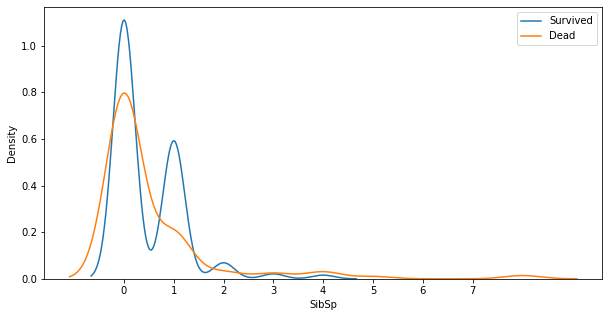

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df['Survived'] == 1]['SibSp'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df['Survived'] == 0]['SibSp'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.xticks(np.arange(0, 8, 1))
plt.show()

## $\Rightarrow$ 혼자서 온 사람이 많이 생존했고, 가족 수가 많을 수록 죽은 비율이 많다.

### Age + Sex

- 나이대 & 성별에 대해서 상관관계가 있을까?

* 결측치 처리 (mean 값으로 처리)
* 범주형 처리  
     0 ~ 9  - 0  
    10 ~ 19 - 1  
    20 ~ 29 - 2  
    30 ~ 39 - 3

In [120]:
titanic_df = pd.read_csv("./titanic_train.csv")
# Age의 NaN의 mean값을 넣어주었다.

titanic_df.fillna(int(titanic_df['Age'].mean()), inplace=True)

In [121]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29,S


In [122]:
titanic_df[['Age', 'Survived']]

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,29.0,0
889,26.0,1


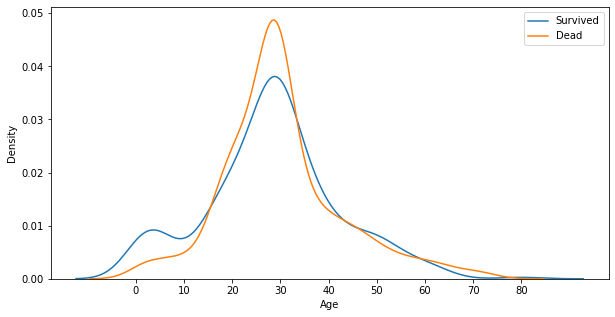

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.xticks(np.arange(0, 90, 10))
plt.show()

In [124]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29,S


In [129]:
titanic_df.loc[titanic_df['Age'] < 10, 'Age'] = 0
titanic_df.loc[(10 <= titanic_df['Age']) & (titanic_df['Age'] < 20), 'Age'] = 1
titanic_df.loc[(20 <= titanic_df['Age']) & (titanic_df['Age'] < 30), 'Age'] = 2
titanic_df.loc[(30 <= titanic_df['Age']) & (titanic_df['Age'] < 40), 'Age'] = 3
titanic_df.loc[(40 <= titanic_df['Age']) & (titanic_df['Age'] < 50), 'Age'] = 4
titanic_df.loc[(50 <= titanic_df['Age']) & (titanic_df['Age'] < 60), 'Age'] = 5
titanic_df.loc[60 <= titanic_df['Age'], 'Age'] = 6

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,29,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,29,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,29,S


In [133]:
titanic_df[['Survived', 'Age']].groupby('Age').count()

,Survived
Age,
0.0,62
1.0,102
2.0,397
3.0,167
4.0,89
5.0,48
6.0,26


In [134]:
titanic_df[['Survived', 'Age']].groupby('Age').sum()

,Survived
Age,
0.0,38
1.0,41
2.0,129
3.0,73
4.0,34
5.0,20
6.0,7


In [135]:
titanic_df[['Survived', 'Age']].groupby('Age').mean()

,Survived
Age,
0.0,0.612903
1.0,0.401961
2.0,0.324937
3.0,0.437126
4.0,0.382022
5.0,0.416667
6.0,0.269231


### $\Rightarrow$ `.sum()`으로 봤을 때는 20대가 가장 많이 살았습니다.
### 평균적으로 볼때는 10세 이하인 사람들이 많이 살아남았습니다.